<a href="https://colab.research.google.com/github/Bimee-Stack/Advanced-Mathematics-Coursework/blob/main/Advanced_Mathematics_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 01 (a)

In [34]:
import sympy as sp

x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

Tb = a * x**2 + b * y**2
grad_Tb = (sp.diff(Tb, x), sp.diff(Tb, y))
print("Gradient of Tb:", grad_Tb)

Tt = sp.sqrt(c * (x**2 + y**2))
grad_Tt = (sp.diff(Tt, x), sp.diff(Tt, y))
print("Gradient of Tt:", grad_Tt)

Gradient of Tb: (2*a*x, 2*b*y)
Gradient of Tt: (sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2))


Problem 01 (b)

Buses depend on :
  
1.   Actual distance they travel
2.   Extra Delays (Stops & Traffic Lights)

*  'a'- measures how bad stops
*  'b'- measures how bad traffic
*   If ax>by : (lots of stops on the route ) A long rote with a bus stop every few blocks
*   If ax<by : (heay traffic) Buses usually suffer most from all those frequent stops,even more than from the miles they drive


---
Taxis :

1.   Distance * Traffic delays


*   When traffic is light,The trip is mostly depend on the distance (delays are small)
*   When the traffic is heavy,The congestion completely takes over and the trip feels endlessly slow,no matter the distance(delays are huge)















Problem 02 (a)

In [35]:
t = sp.symbols('t')

Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Fb(x) =", Fb)
print("Ft(x) =", Ft)

Fb(x) = x**2 + x
Ft(x) = 3*x**2/2 + 2*x


Problem 02 (b)

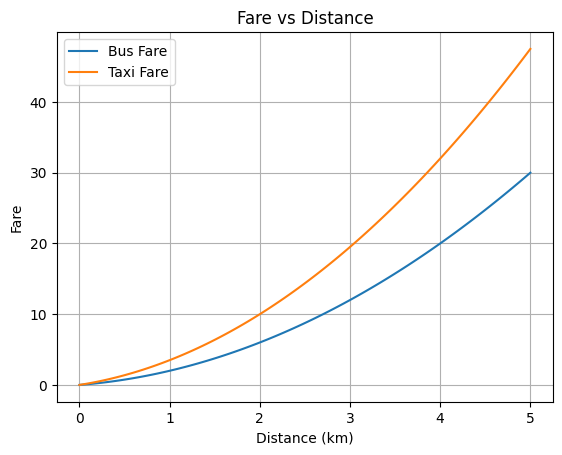

In [36]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 5, 100)
Fb_num = xs**2 + xs
Ft_num = 1.5 * xs**2 + 2 * xs

plt.figure()
plt.plot(xs, Fb_num, label='Bus Fare')
plt.plot(xs, Ft_num, label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()

Problem 02 (c)

Bus is more affordable for budget with passengers on longer routes,while Taxi suits for short distances,time sensitive trips despite higher cost.


Problem 03 (a)

In [37]:
t_sym = sp.symbols('t')
series_terms = - (3/2) * t_sym**2 + (1/4) * t_sym**4 - (1/6) * t_sym**6 + (1/8) * t_sym**8 - (1/10) * t_sym**10 + (1/12) * t_sym**12

P_approx = 5 + 4 * sp.sin(sp.pi * t_sym) + series_terms
print("P(t) approx:", P_approx)

P_np = sp.lambdify(t_sym, P_approx, 'numpy')

P(t) approx: 0.0833333333333333*t**12 - 0.1*t**10 + 0.125*t**8 - 0.166666666666667*t**6 + 0.25*t**4 - 1.5*t**2 + 4*sin(pi*t) + 5


Problem 03 (b)

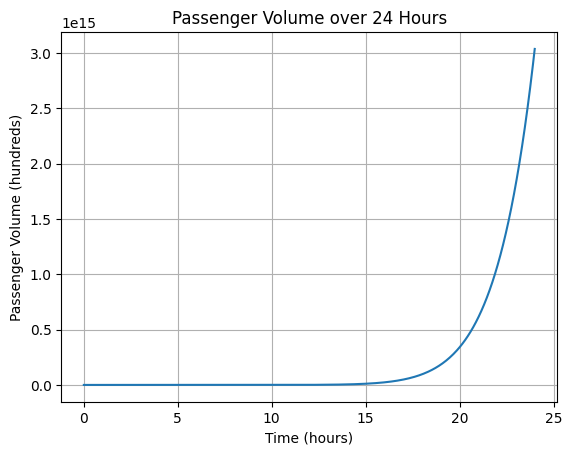

In [38]:
ts = np.linspace(0, 24, 500)
P_vals = P_np(ts)

plt.figure()
plt.plot(ts, P_vals)
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Passenger Volume over 24 Hours')
plt.grid(True)
plt.show()

Problem 04 (a)

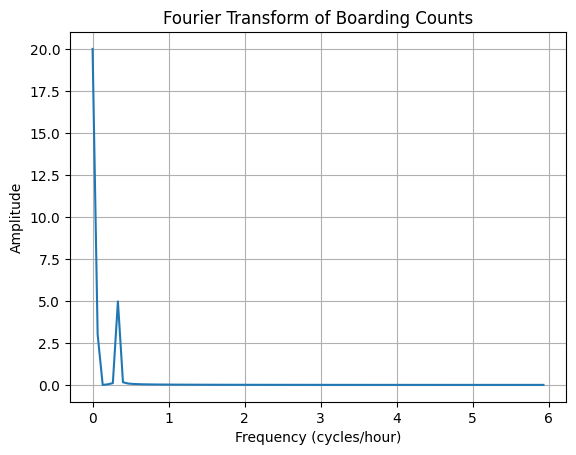

In [39]:
from scipy.fft import fft, fftfreq

# Synthetic data: 5-min intervals from 6AM to 9PM (15 hours = 180 points)
times = np.linspace(0, 15, 180)  # hours
boarding = 10 + 5 * np.sin(2 * np.pi * times / 3) + 3 * np.sin(2 * np.pi * times / 15)  # peaks every 3 and 15 hrs

# FFT
N = len(boarding)
yf = fft(boarding)
xf = fftfreq(N, 5/60)  # freq in per hour (5 min = 1/12 hour)

plt.figure()
plt.plot(xf[:N//2], 2/N * np.abs(yf[:N//2]))
plt.xlabel('Frequency (cycles/hour)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Boarding Counts')
plt.grid(True)
plt.show()

Problem 04 (b)

Problem 04 (c)

Problem 05 (a)

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load image
img = cv2.imread('/content/ehicle_plate.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_height = img_rgb.shape[0]
frontImg = img_rgb[0:img_height//3,:,:]
backImg = img_rgb[img_height//3,:,:]



afterGSF = cv2.cvtColor(frontImg, cv2.COLOR_BGR2GRAY)

afterGSB = cv2.cvtColor(backImg, cv2.COLOR_BGR2GRAY)



plt.figure(figsize=(6,4))
plt.imshow(afterGSF, cmap='gray')
plt.title('Grayscale Image Front')
plt.axis('off')

plt.figure(figsize=(6,4))
plt.imshow(afterGSB, cmap='gray')
plt.title('Grayscale Image Back')
plt.axis('off')

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


Problem 05 (b)

In [ ]:
# 2D FFT
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)


magnitude = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(6,4))
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum (FFT Shifted)-Grayscale')
plt.axis('off')

Problem 05 (c)

In [ ]:
# Edge detection
edges = cv2.Canny(gray, 100, 200)


plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


plate_candidates = []
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  aspect_ratio = w / float(h)


# Typical number plate ratio
  if 1.5 < aspect_ratio < 6 and w > 100 and h > 30:
    plate_candidates.append((x, y, w, h))


# Draw bounding boxes
  img_copy = img_rgb.copy()
  for (x, y, w, h) in plate_candidates:
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0), 2)


plt.figure(figsize=(6,4))
plt.imshow(img_copy)
plt.title('Detected Number Plate Region')
plt.axis('off')

Problem 05 (d)

Fourier Transform

The Fourier Transform shows how image detalis are distributed interms of frequency

*   Low frequencies
    
    Represent smooth and uniform areas such as the background in terms of the number plate
*   Low frequencies

    Represent edges,corners and text,such as the letters and numbers on the plate

    From the magnitude spectrum :





*   A bright center means the image has strong background information
*   Bright regions away from the center indicate sharp eddges and characters.
It helps us understand where important details like text are located in the image.


Discrete Cosine Transform(DCT)

The DCT works simlilarly to Fourier Transform but is more comact



*   Most important information is stored in a few low-frequencyDC confficients.
*   High-frequency coefficients mainly contain fine details and noise.

How do fourier and DCT help in number plate recognition?


1.   Improving text detection

* NUmber plates contain strong edges and repeated patterns(letters and numbers)
* These appear clearly in the high-frequency components
* Frequncy analysis makes it easier to seperate text from the background.    




2.   Noise and lighting reduction


*   By removing unwanted high-frequency noise or very low-frequency lighting variations,the plate becomes clearer to for OCR.


3.   Feature Extraction


*   DCT coefficients can be used as compact features for machine learning models.
*   This improves recognition accuracy while reducing computation time


4.  Compression and Speed


*   DCT helps store and process images efficiently,which is important for real-time systems like traffic cameras.

Potential applications for traffic optimisation

Fourier and DCT-based number plate recognition can support:


*   Traffic Monitoring
*   Route Optimization
*   Law Enforcment
*   Smart city applications














